In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

def generate_predictors(n, max_range=10):
    x = np.random.random_sample(n)*max_range
    return(x)
    
predictors = generate_predictors(25, max_range=10)
print(predictors)

[ 0.9694479   3.15731061  1.97721769  4.06765595  0.17581741  1.514502
  2.89397665  0.95434105  0.45322483  2.03544777  8.73030249  6.20258966
  5.4052588   4.90782682  2.15399921  5.67144361  9.18943508  0.49779342
  3.80281152  7.50732417  7.35263497  2.0764223   8.8577753   2.15612539
  6.07820908]


In [4]:
def y_normal_noise(x, noise_mean, noise_std):
    y = x + np.random.normal(noise_mean, noise_std, size=len(x))
    return(y)

In [5]:
responses = y_normal_noise(predictors, 0, 4)
print responses

[  0.25379501  13.48199398   3.97189212  -0.06193362   2.18330435
   2.47435828  -0.77849096  -1.76400313   1.41090419   0.88545313
   1.66384953   6.53336847   4.02302813   0.826523     6.16095923
   5.66743202  16.68657849   2.72984889   9.73098076   6.82297175
  -0.35781282  -1.48011015  12.49434389   5.31844697   1.98141122]


In [16]:
def leastsq_reg(x,y):
    reg = sm.OLS(y, sm.add_constant(x)).fit()
    print reg.summary()
    return reg

In [17]:
lsm = leastsq_reg(predictors, responses)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     6.186
Date:                Wed, 17 Aug 2016   Prob (F-statistic):             0.0206
Time:                        13:49:11   Log-Likelihood:                -71.320
No. Observations:                  25   AIC:                             146.6
Df Residuals:                      23   BIC:                             149.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9616      1.514      0.635      0.5

In [22]:
def plot_regression(x, y, model):
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    
    intercept = model.params[0]
    slope = model.params[1]

    for x_, y_ in zip(x, y):    
        plt.plot((x_, x_), (y_, x_*slope + intercept),
                 'k-', ls='dashed', lw=1)
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    regline_y = x_points*slope + intercept

    plt.plot(regline_x, regline_y, c='darkred', lw=3.5)

    plt.show()

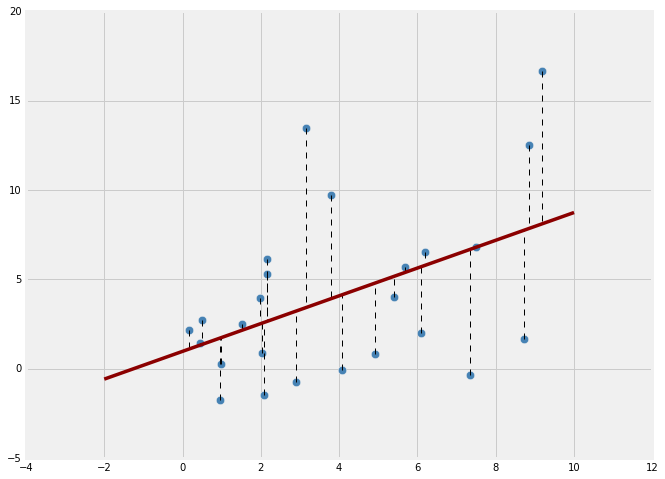

In [24]:
plot_regression(predictors, responses, lsm)

In [26]:
def plot_leastsq_loss(model):
    plt.figure(figsize=(10,8))
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    for r in resids:
        plt.plot((r, r), (0, r**2), 'k-', ls='dashed', lw=2)
        
    plt.plot(resid_points, resid_points**2, c='gold', alpha=0.7)

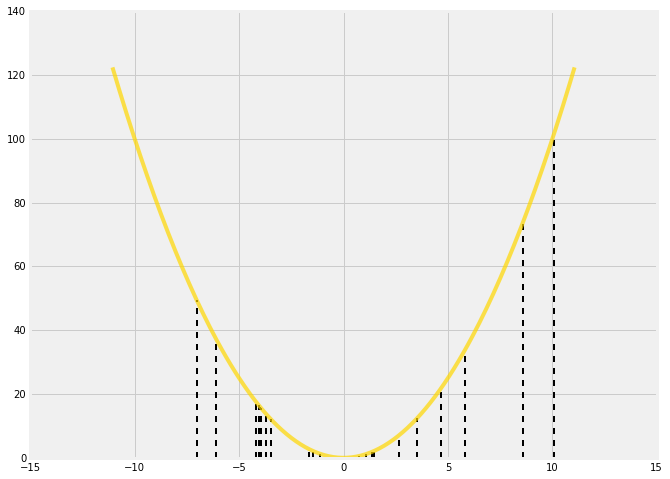

In [27]:
plot_leastsq_loss(lsm)

In [28]:
 def y_outlier_noise_generator(x, noise_mean, noise_std):
        y = x + np.random.normal(noise_mean, noise_std, size=len(x))
        y[0] = y[0]*noise_std*7
        return y

In [29]:
responses_outlier = y_outlier_noise_generator(predictors, 0, 4)
print responses_outlier

[  1.61735989e+02   6.55937087e-01  -6.45181737e+00   4.55542345e+00
   2.42495253e+00   5.02521017e-01   4.54329801e+00  -1.43845120e-01
   1.92394802e+00   8.40468721e+00   1.16540378e+01   3.13901297e+00
   2.62763768e+00   8.14933725e-01  -2.31156163e+00  -1.83615752e+00
   8.67366651e+00   4.74996049e-01  -4.79592316e+00   4.28289425e+00
   7.78743848e+00   1.78585741e+00   8.56495997e+00  -1.78153051e+00
   2.36459309e+00]


In [30]:
leastsq_outlier_mod = leastsq_reg(predictors, responses_outlier)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4512
Date:                Wed, 17 Aug 2016   Prob (F-statistic):              0.508
Time:                        14:01:40   Log-Likelihood:                -121.49
No. Observations:                  25   AIC:                             247.0
Df Residuals:                      23   BIC:                             249.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.9564     11.259      1.328      0.1

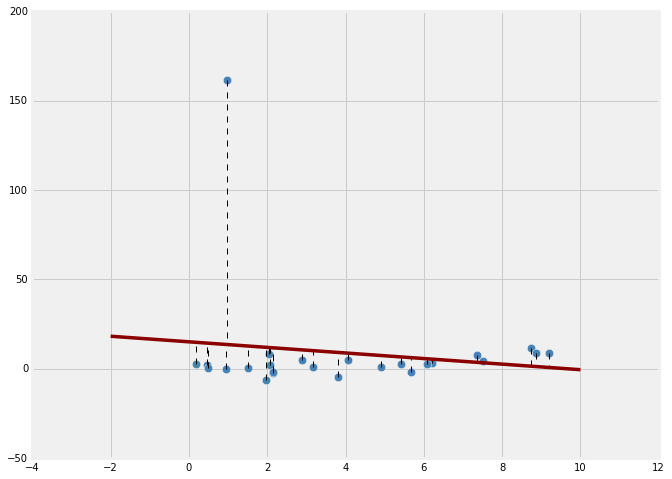

In [32]:
plot_regression(predictors, responses_outlier, leastsq_outlier_mod)

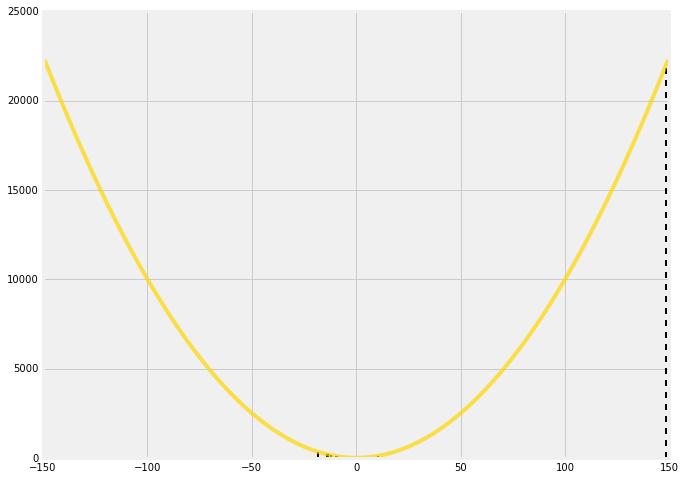

In [33]:
plot_leastsq_loss(leastsq_outlier_mod)

In [34]:
def quantreg(x, y, q=0.5):
    reg = QuantReg(y, sm.add_constant(x)).fit(q=q)
    print reg.summary()
    return reg

In [35]:
lad_outlier_mod = quantreg(predictors, responses_outlier, q=0.5)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04969
Model:                       QuantReg   Bandwidth:                       6.020
Method:                 Least Squares   Sparsity:                        11.88
Date:                Wed, 17 Aug 2016   No. Observations:                   25
Time:                        14:21:08   Df Residuals:                       23
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4529      2.056     -0.220      0.828        -4.706     3.801
x1             0.6308      0.425      1.485      0.151        -0.248     1.509


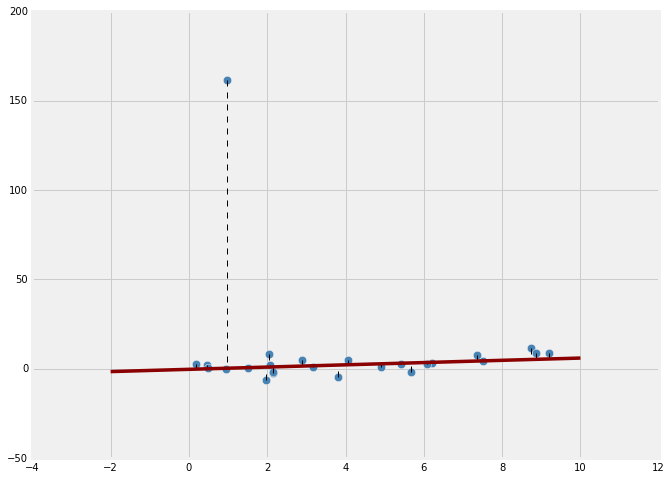

In [36]:
plot_regression(predictors, responses_outlier, lad_outlier_mod)

In [37]:
def plot_residuals_ladloss(model):
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    plt.figure(figsize=(10,8))
    
    for r in resids:
        
        plt.plot((r, r), (0, abs(r)), 'k-', ls='dashed', lw=1)
        
    plt.plot(resid_points, np.abs(resid_points), c='gold', alpha=0.7)

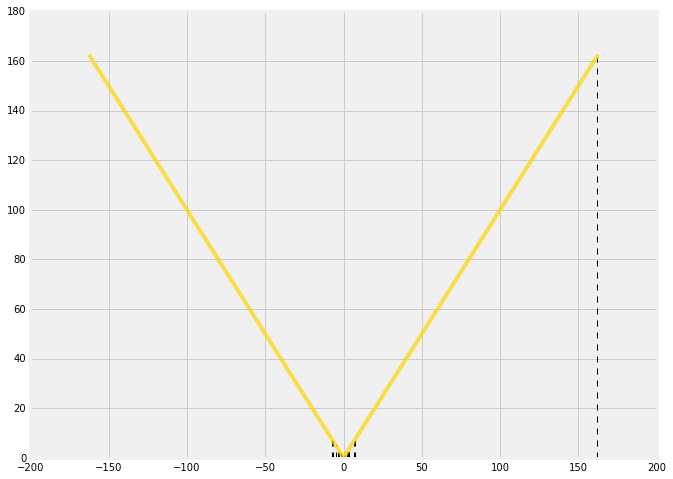

In [38]:
plot_residuals_ladloss(lad_outlier_mod)

In [39]:
def plot_lstsq_lad_regressions(x, y, sq_model, lad_model):
    
    sq_intercept = sq_model.params[0]
    sq_slope = sq_model.params[1]
    
    lad_intercept = lad_model.params[0]
    lad_slope = lad_model.params[1]
    
    plt.figure(figsize=(10,8))
    
    axes = plt.gca()
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    sq_regline_y = x_points*sq_slope + sq_intercept
    lad_regline_y = x_points*lad_slope + lad_intercept

    plt.plot(regline_x, sq_regline_y, c='red', lw=3)
    plt.plot(regline_x, lad_regline_y, c='green', lw=3)

    plt.show()

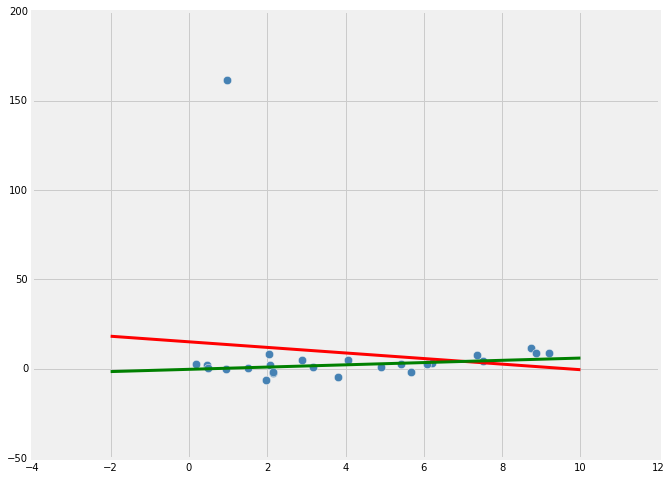

In [42]:
plot_lstsq_lad_regressions(predictors, responses_outlier, leastsq_outlier_mod, lad_outlier_mod)

In [43]:
lad_mod = quantreg(predictors, responses, q=0.5)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.08571
Model:                       QuantReg   Bandwidth:                       7.179
Method:                 Least Squares   Sparsity:                        13.48
Date:                Wed, 17 Aug 2016   No. Observations:                   25
Time:                        14:26:07   Df Residuals:                       23
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3754      2.333      0.590      0.561        -3.451     6.201
x1             0.7256      0.482      1.506      0.146        -0.271     1.722


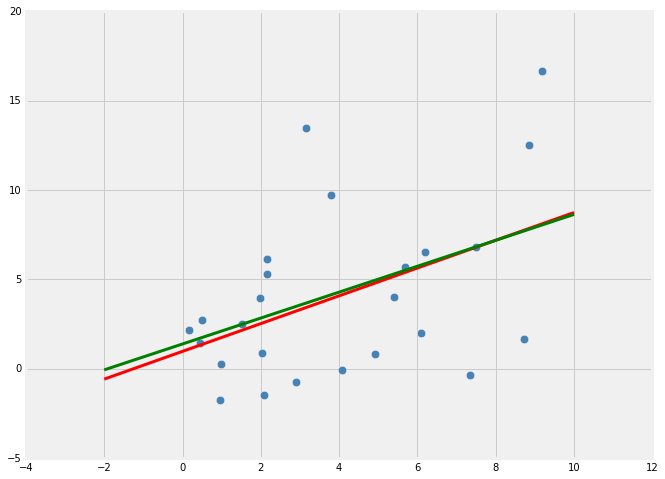

In [48]:
plot_lstsq_lad_regressions(predictors, responses, lsm, lad_mod)

# Gradient Descent

In [49]:
def mean_squared_error(y_true, x, beta0, beta1):
    y_pred = beta0 + x * beta1
    mean_sq_err = np.mean((y_true - y_pred)**2)
    return mean_sq_err

In [51]:
def gradient_update(y, x, beta0, beta1, step_size):

    beta0_gradient = 0
    beta1_gradient = 0
    
    N = float(len(y))
    
    for i in range(len(y)):
    
        beta0_gradient += (2./N * -1 * (y[i] - (beta0 + beta1*x[i])))
        
        beta1_gradient += (2./N * -1 * x[i] * (y[i] - (beta0 + beta1*x[i])))
         
    beta0 = beta0 - (step_size * beta0_gradient)
    beta1 = beta1 - (step_size * beta1_gradient)
    
    return [beta0, beta1]

In [52]:
def gradient_descent_iterator(y, x, beta0, beta1, step_size=.0001, iterations=500):
    
    mean_squared_errors = []
    mean_squared_errors.append(mean_squared_error(y, x, beta0, beta1))
    
    beta0s = [beta0]
    beta1s = [beta1]
    
    for i in range(iterations):
        [beta0, beta1] = gradient_update(y, x, beta0, beta1, step_size)
        mean_squared_errors.append(mean_squared_error(y, x, beta0, beta1))
        beta0s.append(beta0)
        beta1s.append(beta1)
        
    return [mean_squared_errors, beta0s, beta1s]

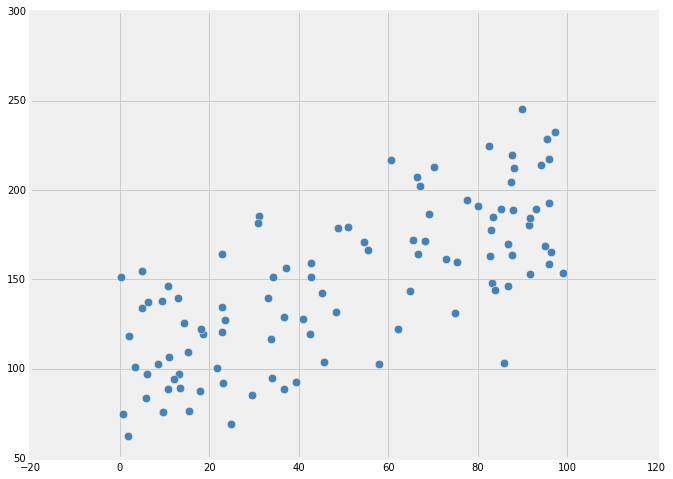

In [53]:
x = np.random.random_sample(100)*100
y = x + np.random.normal(np.random.normal(0,15), 30, size=100) + 100

plt.figure(figsize=(10,8))

plt.scatter(x, y, s=70, c='steelblue')

plt.show()

In [55]:
[mses, betas0, beta1s] = gradient_descent_iterator(y,x, 0, 0)

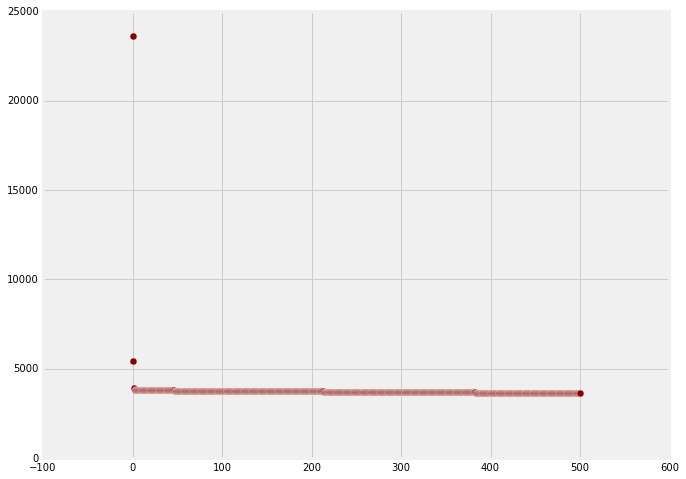

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(mses)), mses, s=50, c='darkred')
plt.show()

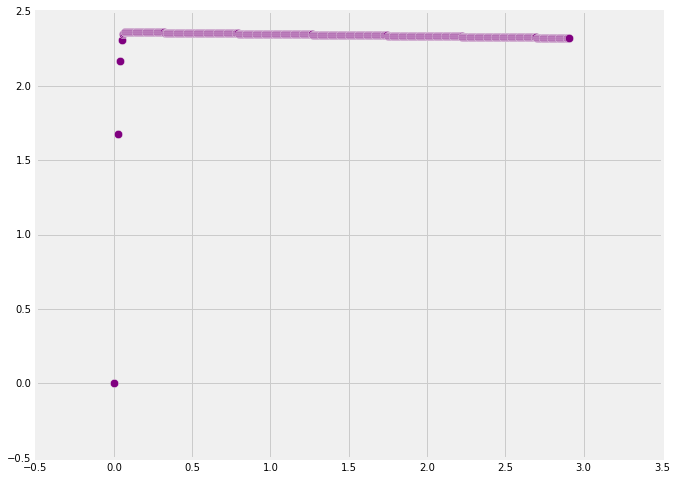

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(betas0, beta1s, s=70, c='purple')
plt.show()

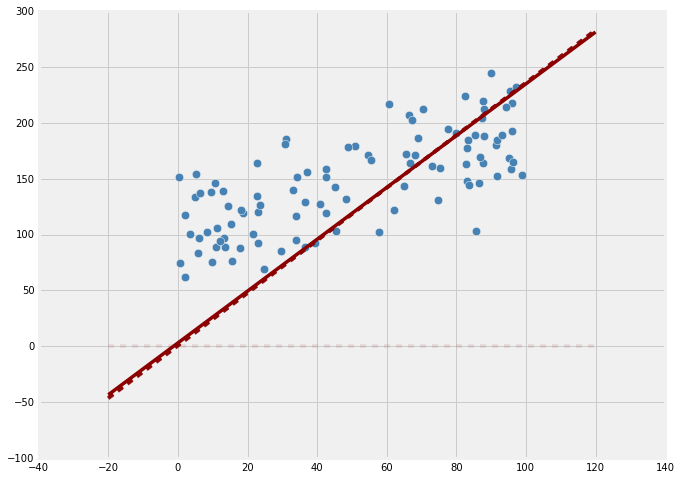

In [61]:
plt.figure(figsize=(10,8))
axes = plt.gca()
plt.scatter(x, y, s=70, c='steelblue')

x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
plt.plot(x_points, x_points*beta1s[0] + betas0[0], c='darkred', lw=3.5, ls='dashed', alpha=0.1)
plt.plot(x_points, x_points*beta1s[25] + betas0[25], c='darkred', lw=3.5, ls='dashed', alpha=0.2)
plt.plot(x_points, x_points*beta1s[50] + betas0[50], c='darkred', lw=3.5, ls='dashed', alpha=0.3)
plt.plot(x_points, x_points*beta1s[50] + betas0[75], c='darkred', lw=3.5, ls='dashed', alpha=0.4)
plt.plot(x_points, x_points*beta1s[100] + betas0[100], c='darkred', lw=3.5, ls='dashed', alpha=0.6)
plt.plot(x_points, x_points*beta1s[150] + betas0[150], c='darkred', lw=3.5, ls='dashed', alpha=0.8)
plt.plot(x_points, x_points*beta1s[-1] + betas0[-1], c='darkred', lw=3.5, alpha=1.0)

plt.show()

In [62]:
def func(x):
    if x <= 1:
        return 2 * x * x
    return 2

def gradient(x):
    if x <= 1:
        return 4 * x
    return 0

def gradient_descent(x, l=0.1):
    vector = np.array(x)
    return vector - l * np.array(gradient(x))


def iterate(x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        x = gradient_descent(xs[-1], l=0.1)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

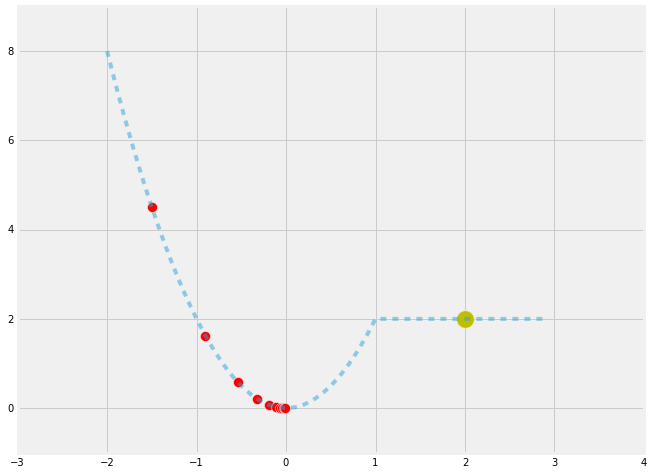

In [63]:
xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.figure(figsize=(10,8))
plt.plot(xs, ys, alpha=0.5, ls='dashed')

# Start gradient descent at x = -1.5
xs2, ys2 = iterate(-1.5, n=10)
plt.scatter(xs2, ys2, c='r', s=100)

# Start gradient descent at x = 2
xs2, ys2 = iterate(2, n=10)
plt.scatter(xs2, ys2, c='y', s=300)